In [1]:
import pandas as pd
import numpy as np
from decimal import Decimal
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/diamonds-m.csv")
df.head()


,id,carat,cut,color,clarity,popularity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,Good,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,Good,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,Fair,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,Poor,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,Good,63.3,58.0,335.0,4.34,4.35,2.75


# 1 . What is structure of the dataset . 

In [3]:
df.shape

(53940, 12)

# 2. What are the DataTypes of each columns?

In [4]:
df.dtypes

id              int64
carat         float64
cut            object
color          object
clarity        object
popularity     object
depth         float64
table         float64
price         float64
x             float64
y             float64
z              object
dtype: object

# 3. What is the length of alphanumeric values

In [5]:
df.cut.str.isalnum().sum()

41858

In [6]:
df.color.str.isalnum().sum()

53937

In [7]:
df.clarity.str.isalnum().sum()

53940

In [8]:
df.popularity.str.isalnum().sum()

53930

In [9]:
df.z.str.isalnum().sum()#Not a alphanumeric column

855

# 4. What are precision and scale of numeric columns?

In [10]:
def scale(num):
    num=Decimal(str(num))
    count = 0
    while num * 10**count % 1 != 0:
        count = count+1
    return count
def precision(num):
    
    count = scale(num)
    while num!=0:
        count+=1
        num=num//10
    return count
precision(.29)

3

In [11]:

col=[]
for col1 in df.columns:
    if df[col1].dtype !='object':
        col.append(col1)
    else:
        pass


In [12]:


for col2 in col:
    arr1=[]
    for i in df[col2].dropna():
        
        arr1.append(precision(i))
    ser1=pd.Series(arr1)
    print(ser1)
print(col)

0        1
1        1
2        1
3        1
4        1
        ..
53935    5
53936    5
53937    5
53938    5
53939    5
Length: 53940, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
53933    3
53934    3
53935    2
53936    3
53937    3
Length: 53938, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
53935    3
53936    3
53937    3
53938    2
53939    3
Length: 53940, dtype: int64
0        2
1        2
2        2
3        2
4        2
        ..
53935    2
53936    2
53937    2
53938    2
53939    2
Length: 53940, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
53931    4
53932    4
53933    4
53934    4
53935    4
Length: 53936, dtype: int64
0        3
1        3
2        3
3        2
4        3
        ..
53935    3
53936    3
53937    3
53938    3
53939    3
Length: 53940, dtype: int64
0        3
1        3
2        3
3        3
4        3
        ..
53935    3
53936    3
53937    3
53938  

In [13]:


        
        

print(col)
for col2 in col:
    arr2=[]
    for i in df[col2].dropna():
        
        arr2.append(scale(i))
    ser=pd.Series(arr2)
    print(ser)

        

['id', 'carat', 'depth', 'table', 'price', 'x', 'y']
0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Length: 53940, dtype: int64
0        2
1        2
2        2
3        2
4        2
        ..
53933    2
53934    2
53935    1
53936    2
53937    2
Length: 53938, dtype: int64
0        1
1        1
2        1
3        1
4        1
        ..
53935    1
53936    1
53937    1
53938    0
53939    1
Length: 53940, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
53935    0
53936    0
53937    0
53938    0
53939    0
Length: 53940, dtype: int64
0        0
1        0
2        0
3        0
4        0
        ..
53931    0
53932    0
53933    0
53934    0
53935    0
Length: 53936, dtype: int64
0        2
1        2
2        2
3        1
4        2
        ..
53935    2
53936    2
53937    2
53938    2
53939    2
Length: 53940, dtype: int64
0        2
1        2
2        2
3        2
4        

# 5.1 For each column find number of null values

In [14]:
print("Number of Null values in column id:",df.id.isnull().sum())
print("Number of Null values in column carat:",df.carat.isnull().sum())
print("Number of Null values in column cut:",df.cut.isnull().sum())
print("Number of Null values in column color:",df.color.isnull().sum())
print("Number of Null values in column clarity:",df.clarity.isnull().sum())
print("Number of Null values in column popularity:",df.popularity.isnull().sum())
print("Number of Null values in column depth:",df.depth.isnull().sum())
print("Number of Null values in column table:",df.table.isnull().sum())
print("Number of Null values in column price:",df.price.isnull().sum())
print("Number of Null values in column x:",df.x.isnull().sum())
print("Number of Null values in column y:",df.y.isnull().sum())
print("Number of Null values in column z:",df.z.isnull().sum())

Number of Null values in column id: 0
Number of Null values in column carat: 2
Number of Null values in column cut: 0
Number of Null values in column color: 3
Number of Null values in column clarity: 0
Number of Null values in column popularity: 10
Number of Null values in column depth: 0
Number of Null values in column table: 0
Number of Null values in column price: 4
Number of Null values in column x: 0
Number of Null values in column y: 0
Number of Null values in column z: 0


# 5.2 Find number of zeros in each column

In [15]:
print("Number of zeros in column id:",(df.id==0).sum() )
print("Number of zeros in column carat:",(df.carat==0).sum())
print("Number of zeros in column cut:",(df.cut==0).sum())
print("Number of zeros in column color:",(df.color==0).sum())
print("Number of zeros in column clarity:",(df.clarity==0).sum())
print("Number of zeros in column popularity:",(df.popularity==0).sum())
print("Number of zeros in column depth:",(df.depth==0).sum())
print("Number of zeros in column table:",(df.table==0).sum())
print("Number of zeros in column price:",(df.price==0).sum())
print("Number of zeros in column x:",(df.x==0).sum())
print("Number of zeros in column y:",(df.y==0).sum())
print("Number of zeros in column z:",(df.z==0).sum())

Number of zeros in column id: 0
Number of zeros in column carat: 0
Number of zeros in column cut: 0
Number of zeros in column color: 0
Number of zeros in column clarity: 0
Number of zeros in column popularity: 0
Number of zeros in column depth: 0
Number of zeros in column table: 0
Number of zeros in column price: 0
Number of zeros in column x: 8
Number of zeros in column y: 7
Number of zeros in column z: 0


# 5.3 Provide the obvious errors

# 5.4 Identify columns which should not be alpha-numeric


In [16]:
# Column z shouldn't be alpha-numeric since it can used in further calculations.

In [17]:
df.z=pd.to_numeric(df.z,errors='coerce')


# 6. For each Numeric column :-
## Columns are
 1] Carat  
 2] depth  
 3] table  
 4] price  
 5] x   
 6] y  
 7] z 

# 6.1 Replace zero values with suitable statistical value of the column.Give Reason why.

We will consider the middle value of the the dataset i.e the median of the the columns to maintain the symmetry of the distribution of data. We could have consider mean value, but median value being more robust than mean we'll replace zeros with median.

In [18]:
df.x.replace(to_replace=0,value=df.x.median,inplace=True)
df.x=pd.to_numeric(df.x,errors='coerce')
df.y.replace(0,df.y.median,inplace=True)
df.y=pd.to_numeric(df.y,errors='coerce')

# 6.2 Replace null values with lower of mean and median value of the column

In [19]:
print("Mean of carat:",df.carat.mean())
print("Median of carat:",df.carat.median())

Mean of carat: 0.7979465312024917
Median of carat: 0.7


In [20]:
#Since value Median is lower tha mean we will replace the null values of column carat with its median

df['carat'].fillna(df['carat'].median(),inplace=True)


In [21]:
df.carat.isna().sum()

0

In [22]:
print("Mean of carat:",df.price.mean())
print("Median of carat:",df.price.median())

Mean of carat: 3932.8338215663007
Median of carat: 2401.0


In [23]:
#Since value Median is lower tha mean we will replace the null values of column price with its median
df.price.fillna(df.price.median(),inplace=True)
df.price=pd.to_numeric(df.price,errors="ignore")

In [24]:
df.price.isna().sum()


0

In [25]:

print("Mean of z ", df.z.mean())
print("Median of z",df.z.median())
df.z.fillna(df.z.median(),inplace=True)

Mean of z  3.5387319008509612
Median of z 3.53


In [26]:
df.z.isna().sum()

0

# 6.3 Provide quartile summary along with the count, mean, and sum 

In [27]:
df_summary=df.drop(columns='id')

In [28]:
df_summary.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53932.000000,53933.000000,53940.000000
mean,0.797943,61.749405,57.457184,3932.720226,5.732007,5.735270,3.538732
std,0.474010,1.432621,2.234491,3989.317436,1.119670,1.140339,0.705699
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


# 6.4 Provide the range, variance and standard deviation

In [29]:
#Range of a column is the difference between max and min value of column
print("Range of Carat is :",df.carat.max()-df.carat.min())
print("Range of depth is :",df.depth.max()-df.depth.min())
print("Range of table is :",df.table.max()-df.table.min())
print("Range of x is :",df.x.max()-df.x.min())
print("Range of y is :",df.y.max()-df.y.min())
print("Range of z is :",df.z.max()-df.z.min())

Range of Carat is : 4.81
Range of depth is : 36.0
Range of table is : 52.0
Range of x is : 7.01
Range of y is : 55.22
Range of z is : 31.8


In [30]:
print("variance of carat :",df.carat.var())
print("variance of depth :",df.depth.var())
print("variance of table :",df.table.var())
print("variance of x :",df.x.var())
print("variance of y :",df.y.var())
print("variance of z :",df.z.var())

variance of carat : 0.224685506667356
variance of depth : 2.0524038431766978
variance of table : 4.9929480753375515
variance of x : 1.2536607866550282
variance of y : 1.3003721535676873
variance of z : 0.49801067387721093


In [31]:
print("Standard Deviation of carat :",df.carat.std())
print("Standard Deviation of depth :",df.depth.std())
print("Standard Deviation of table :",df.table.std())
print("Standard Deviation of x :",df.x.std())
print("Standard Deviation of y :",df.y.std())
print("Standard Deviation of z :",df.z.std())

Standard Deviation of carat : 0.47401002802404507
Standard Deviation of depth : 1.432621318833661
Standard Deviation of table : 2.2344905628213225
Standard Deviation of x : 1.119669945410266
Standard Deviation of y : 1.1403386135563802
Standard Deviation of z : 0.7056987132461069


# 6.5 Provide the count of outliers and their value and provide a mechanism to fix it

In [32]:
def outlier_val(df):
    sorted(df)
    q1,q3=np.percentile(df,[25,75])
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    return(df[~df.between(lb,ub)])
print("Outlier in carat:\n",outlier_val(df.carat))
print("Outlier in depth:\n",outlier_val(df.depth))
print("Outlier in table:\n",outlier_val(df.table))
print("Outlier in price:\n",outlier_val(df.price))
print("Outlier in x:\n",outlier_val(df.x))
print("Outlier in y:\n",outlier_val(df.y))
print("Outlier in z:\n",outlier_val(df.z))


Outlier in carat:
 12246    2.06
13002    2.14
13118    2.15
13757    2.22
13991    2.01
         ... 
27741    2.15
27742    2.04
27744    2.29
27746    2.07
27749    2.29
Name: carat, Length: 1889, dtype: float64
Outlier in depth:
 2        56.9
8        65.1
24       58.1
35       58.2
42       65.2
         ... 
53882    65.4
53886    58.0
53890    57.9
53895    57.8
53927    58.1
Name: depth, Length: 2545, dtype: float64
Outlier in table:
 2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64
Outlier in price:
 23820    11886.0
23821    11886.0
23822    11888.0
23823    11888.0
23824    11888.0
          ...   
27745    18803.0
27746    18804.0
27747    18806.0
27748    18818.0
27749    18823.0
Name: price, Length: 3540, dtype: float64
Outlier in x:
 0        3.95
1        3.89
2        4.05
3        4.20
4        4.34
         ... 
53935    

In [33]:
def outlier(df):
    sorted(df)
    #q1,q3=np.percentile(df,[25,75])
    q1=np.percentile(df,25)
    q3=np.percentile(df,75)
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    out1=df[df<lb].count()
    out2=df[df>ub].count()
    out=out1+out2
    return(out)
print(df.carat)

0        0.23
1        0.21
2        0.23
3        0.29
4        0.31
         ... 
53935    0.72
53936    0.72
53937    0.70
53938    0.86
53939    0.75
Name: carat, Length: 53940, dtype: float64


In [34]:
print("Number of outliers in carat:",outlier(df.carat))
print("Number of outliers in depth:",outlier(df.depth))
print("Number of outliers in table:",outlier(df.table))
print("Number of outliers in price:",outlier(df.price))
print("Number of outliers in x:",outlier(df.x))
print("Number of outliers in y:",outlier(df.y))
print("Number of outliers in z:",outlier(df.z))

Number of outliers in carat: 1889
Number of outliers in depth: 2545
Number of outliers in table: 605
Number of outliers in price: 3540
Number of outliers in x: 0
Number of outliers in y: 0
Number of outliers in z: 49


In [35]:
def outlier_med(df):
    sorted(df)
    q1,q3=np.percentile(df,[25,75])
    iqr=q3-q1
    lb=q1-(1.5*iqr)
    ub=q3+(1.5*iqr)
    df[df<lb]=np.nan
    df[df>ub]=np.nan
    df.fillna(df.median(),inplace=True)
    out1=df[df<lb].count()
    out2=df[df>ub].count()
    out=out1+out2
    return(out)

In [36]:
print(outlier_med(df['carat']))
df

0


,id,carat,cut,color,clarity,popularity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,Good,61.5,55.0,326.0,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,Good,59.8,61.0,326.0,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,Fair,56.9,65.0,327.0,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,Poor,62.4,58.0,334.0,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,Good,63.3,58.0,335.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,Good,60.8,57.0,2757.0,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,Good,63.1,55.0,2757.0,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,Good,62.8,60.0,2757.0,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,Good,61.0,58.0,2757.0,6.15,6.12,3.74


In [37]:
outlier_med(df['depth'])



0

In [38]:
outlier_med(df['price'])


0

In [39]:

outlier_med(df['table'])

0

In [40]:


outlier_med(df['x'])

0

In [41]:

outlier_med(df['y'])

0

In [42]:


outlier_med(df['z'])

0

# 7. For each non-numeric columns
-cut  
-color  
-clarity  
-popularity 


## 7.1 Replace Null values with a suitable statistical value of column


In [43]:
df.color.fillna(df['color']. value_counts(). idxmax(),inplace=True)
df.popularity.fillna(df['popularity']. value_counts(). idxmax(),inplace=True)

In [44]:
pd.crosstab(df['color'],columns='count',)

col_0,count
color,
D,6775
E,9797
F,9542
G,11295
H,8303
I,5421
J,2807


In [45]:
pd.crosstab(df['popularity'],columns='count',)

col_0,count
popularity,
Fair,8425
Good,24271
NotAvail,13
Poor,21231


# 8. Provide suitable machanism to convert non-numeric columns to numeric

In [46]:
np.unique(df['cut'])

array(['Fair', 'Good', 'Ideal', 'Premium', 'Unknown', 'Very Good'],
      dtype=object)

In [47]:
df['cut']=df['cut'].map({'Fair':1,'Ideal':5,'Good':2, 'Premium':4, 'Very Good':3})

In [48]:
#Convert the rows Uknown rows to NaN
df[df['cut']=='Unknown']=np.nan

In [49]:
df['cut'].isna().sum()

3

In [50]:
df.cut.fillna(df['cut']. value_counts(). idxmax(),inplace=True)

In [51]:
np.unique(df['cut'])

array([1., 2., 3., 4., 5.])

In [52]:
np.unique(df.color)

array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object)

In [53]:
df.color=df.color.map({'D':7,'E':6,'F':5,'G':4,'H':3,'I':2,'J':1})

In [54]:
np.unique(df.color)

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [55]:
np.unique(df.clarity)

array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
      dtype=object)

In [56]:
df.clarity=df.clarity.map({'IF':8, 'VVS1':7, 'VVS2':6, 'VS1':5 , 'VS2':4 , 'SI1':3, 'SI2':2 , 'I1':1})

In [57]:
np.unique(df.clarity)

array([1, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

In [58]:
np.unique(df.popularity)

array(['Fair', 'Good', 'NotAvail', 'Poor'], dtype=object)

In [59]:
df[df.popularity=='NotAvail']=np.nan
df['popularity']=df.popularity.fillna(method ='pad')

In [60]:
df.popularity=df.popularity.map({'Good':3,'Fair':2,'Poor':1})

In [61]:
np.unique(df.popularity)

array([1, 2, 3], dtype=int64)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          53927 non-null  float64
 1   carat       53927 non-null  float64
 2   cut         53927 non-null  float64
 3   color       53927 non-null  float64
 4   clarity     53927 non-null  float64
 5   popularity  53940 non-null  int64  
 6   depth       53927 non-null  float64
 7   table       53927 non-null  float64
 8   price       53927 non-null  float64
 9   x           53927 non-null  float64
 10  y           53927 non-null  float64
 11  z           53927 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 4.9 MB


# 10. Provide Histogram for all columns and provide your interpretations.

In [63]:
df.head(15)

,id,carat,cut,color,clarity,popularity,depth,table,price,x,y,z
0,1.0,0.23,5.0,6.0,2.0,3,61.5,55.0,326.0,3.95,3.98,2.43
1,2.0,0.21,4.0,6.0,3.0,3,59.8,61.0,326.0,3.89,3.84,2.31
2,3.0,0.23,2.0,6.0,5.0,2,61.9,57.0,327.0,4.05,4.07,2.31
3,4.0,0.29,4.0,2.0,4.0,1,62.4,58.0,334.0,4.20,4.23,2.63
4,5.0,0.31,2.0,1.0,2.0,3,63.3,58.0,335.0,4.34,4.35,2.75
5,6.0,0.24,3.0,1.0,6.0,1,62.8,57.0,336.0,3.94,3.96,2.48
6,7.0,0.24,3.0,2.0,5.0,2,62.3,57.0,336.0,3.95,3.98,2.47
7,8.0,0.26,3.0,3.0,3.0,3,61.9,55.0,337.0,4.07,4.11,2.53
8,9.0,0.22,1.0,6.0,4.0,1,61.9,61.0,337.0,3.87,3.78,2.49
9,10.0,0.23,3.0,3.0,5.0,2,59.4,61.0,2401.0,4.00,4.05,2.39


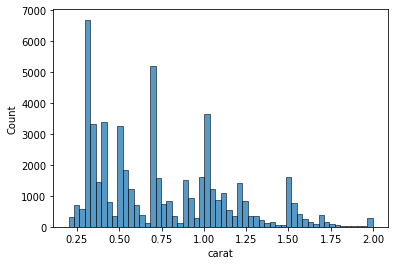

In [64]:
sns.histplot(df.carat)




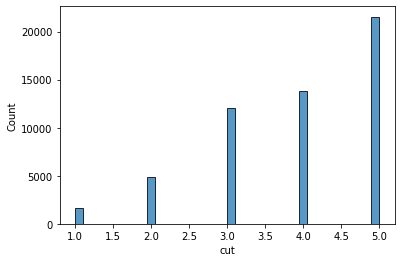

In [65]:
sns.histplot(df.cut)


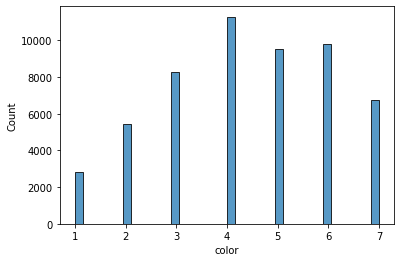

In [66]:
sns.histplot(df.color)


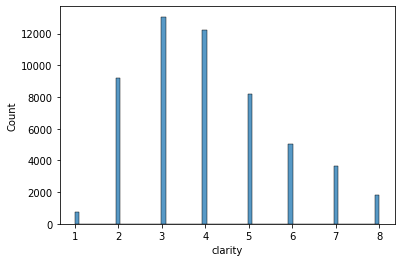

In [67]:
sns.histplot(df.clarity)


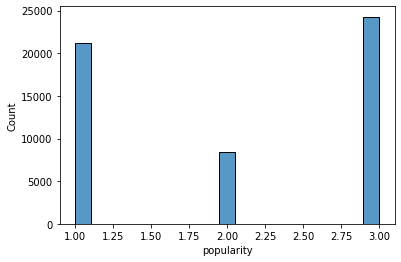

In [68]:
sns.histplot(df.popularity)


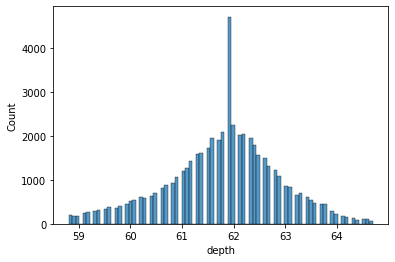

In [69]:
sns.histplot(df.depth)


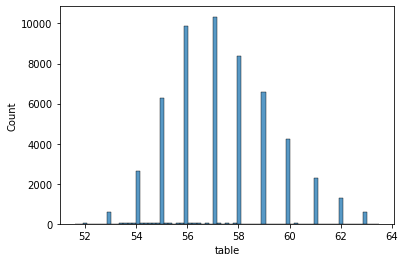

In [70]:
sns.histplot(df.table)


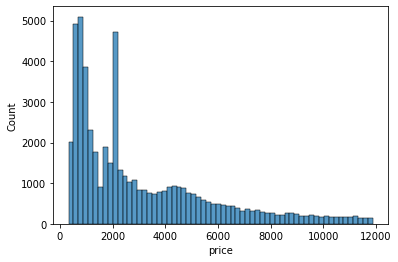

In [71]:
sns.histplot(df.price)


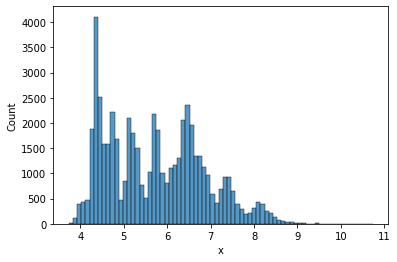

In [72]:
sns.histplot(df.x)


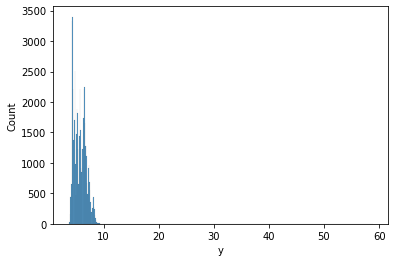

In [73]:
sns.histplot(df.y)

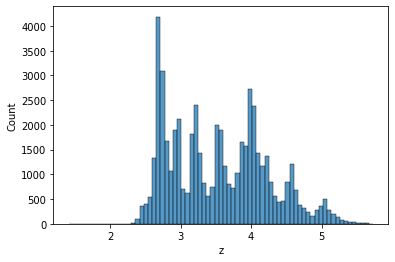

In [74]:

sns.histplot(df.z)

# 11. Provide Boxplots for all columns 

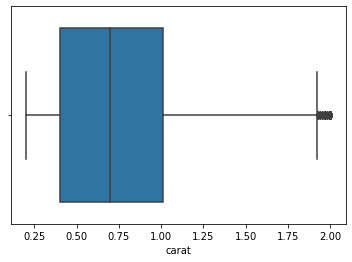

In [75]:
sns.boxplot(x=df.carat)

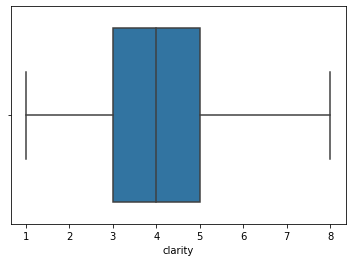

In [76]:
sns.boxplot(x=df.clarity)

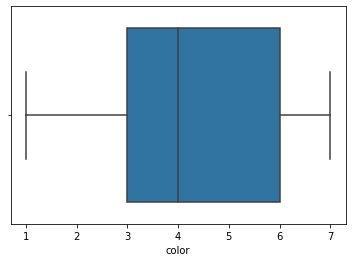

In [77]:
sns.boxplot(x=df.color)

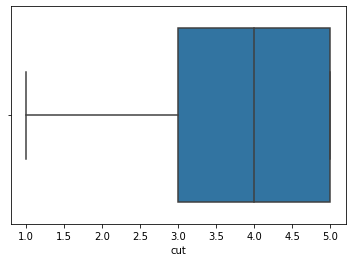

In [78]:
sns.boxplot(x=df.cut)

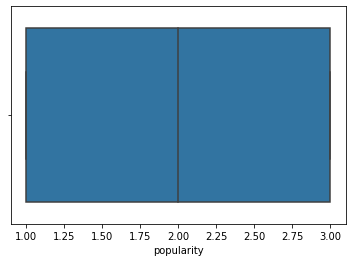

In [79]:
sns.boxplot(x=df.popularity)

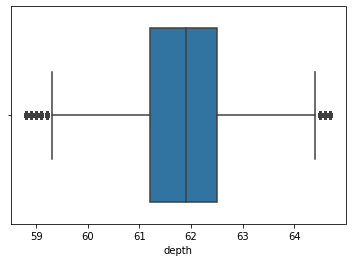

In [80]:
sns.boxplot(x=df.depth)

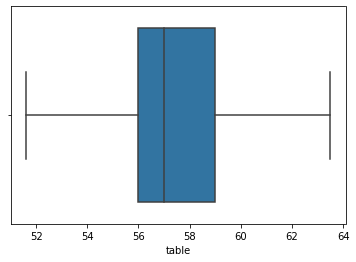

In [81]:
sns.boxplot(x=df.table)

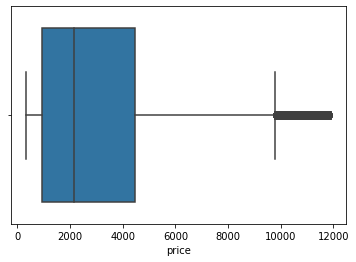

In [82]:
sns.boxplot(x=df.price)

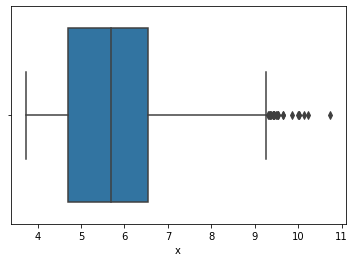

In [83]:
sns.boxplot(x=df.x)

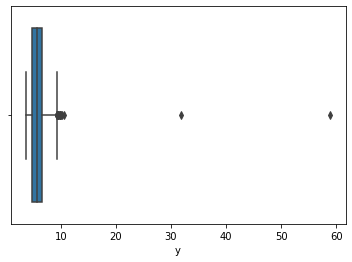

In [84]:
sns.boxplot(x=df.y)

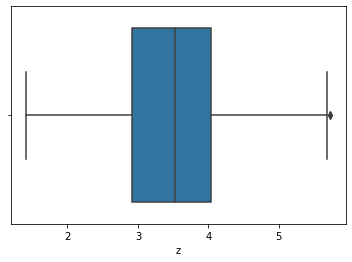

In [85]:
sns.boxplot(x=df.z)

# 12.1 For numeric columns provide correlation table

In [86]:
df.corr()

,id,carat,cut,color,clarity,popularity,depth,table,price,x,y,z
id,1.000000,-0.442580,0.096971,0.095175,0.209563,-0.149051,-0.040152,-0.110357,-0.435679,-0.406638,-0.396781,-0.410697
carat,-0.442580,1.000000,-0.134556,-0.223712,-0.310258,0.194946,0.027691,0.171660,0.793794,0.876476,0.856546,0.879067
cut,0.096971,-0.134556,1.000000,0.020612,0.188877,-0.113398,-0.234147,-0.379708,-0.071663,-0.126125,-0.122077,-0.150210
color,0.095175,-0.223712,0.020612,1.000000,-0.025502,-0.012588,-0.039823,-0.027607,-0.132864,-0.270841,-0.264072,-0.273716
clarity,0.209563,-0.310258,0.188877,-0.025502,1.000000,-0.558045,-0.063093,-0.159660,-0.145313,-0.372847,-0.359027,-0.374509
popularity,-0.149051,0.194946,-0.113398,-0.012588,-0.558045,1.000000,0.039241,0.089089,0.086613,0.239814,0.233031,0.242757
depth,-0.040152,0.027691,-0.234147,-0.039823,-0.063093,0.039241,1.000000,-0.225391,0.009727,-0.017840,-0.021054,0.073063
table,-0.110357,0.171660,-0.379708,-0.027607,-0.159660,0.089089,-0.225391,1.000000,0.122827,0.194538,0.184545,0.160029
price,-0.435679,0.793794,-0.071663,-0.132864,-0.145313,0.086613,0.009727,0.122827,1.000000,0.719952,0.702465,0.719728
x,-0.406638,0.876476,-0.126125,-0.270841,-0.372847,0.239814,-0.017840,0.194538,0.719952,1.000000,0.974926,0.988170


In [87]:
df1=df.drop(columns='id')
df1.corr()

,carat,cut,color,clarity,popularity,depth,table,price,x,y,z
carat,1.000000,-0.134556,-0.223712,-0.310258,0.194946,0.027691,0.171660,0.793794,0.876476,0.856546,0.879067
cut,-0.134556,1.000000,0.020612,0.188877,-0.113398,-0.234147,-0.379708,-0.071663,-0.126125,-0.122077,-0.150210
color,-0.223712,0.020612,1.000000,-0.025502,-0.012588,-0.039823,-0.027607,-0.132864,-0.270841,-0.264072,-0.273716
clarity,-0.310258,0.188877,-0.025502,1.000000,-0.558045,-0.063093,-0.159660,-0.145313,-0.372847,-0.359027,-0.374509
popularity,0.194946,-0.113398,-0.012588,-0.558045,1.000000,0.039241,0.089089,0.086613,0.239814,0.233031,0.242757
depth,0.027691,-0.234147,-0.039823,-0.063093,0.039241,1.000000,-0.225391,0.009727,-0.017840,-0.021054,0.073063
table,0.171660,-0.379708,-0.027607,-0.159660,0.089089,-0.225391,1.000000,0.122827,0.194538,0.184545,0.160029
price,0.793794,-0.071663,-0.132864,-0.145313,0.086613,0.009727,0.122827,1.000000,0.719952,0.702465,0.719728
x,0.876476,-0.126125,-0.270841,-0.372847,0.239814,-0.017840,0.194538,0.719952,1.000000,0.974926,0.988170
y,0.856546,-0.122077,-0.264072,-0.359027,0.233031,-0.021054,0.184545,0.702465,0.974926,1.000000,0.963933


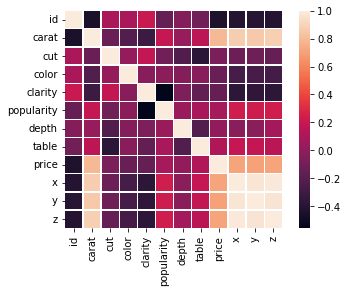

In [88]:
sns.heatmap(data=df.corr(),
            square=True,linewidths=.2)


# 13. Prepare a relationship chart showing relation of each numeric column                with the price column

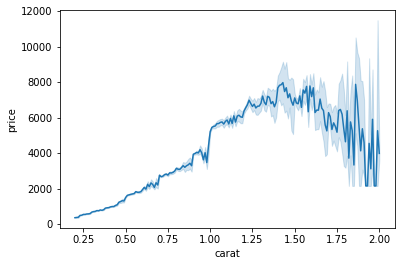

In [89]:
sns.lineplot(x=df.carat,y=df.price)

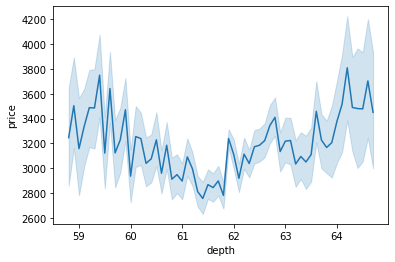

In [90]:
sns.lineplot(x=df.depth,y=df.price)

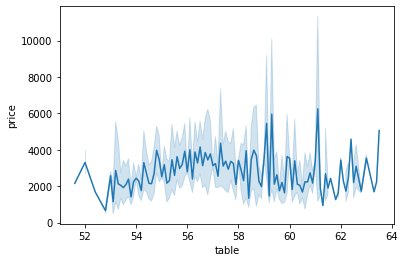

In [91]:
sns.lineplot(x=df.table,y=df.price)

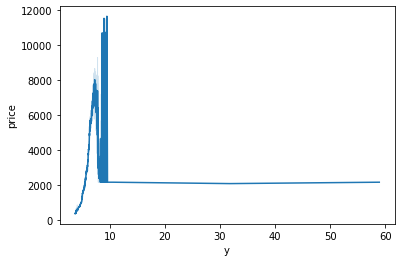

In [92]:
sns.lineplot(x=df.y,y=df.price)

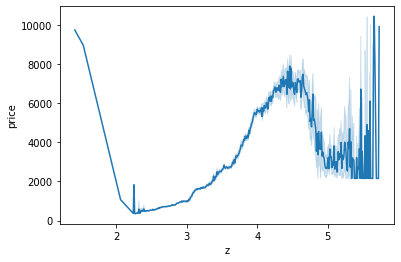

In [93]:
sns.lineplot(x=df.z,y=df.price)

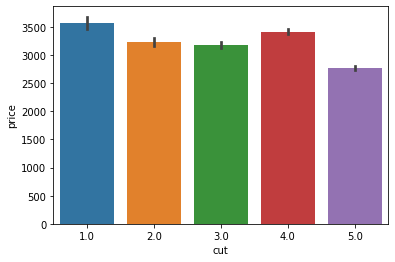

In [94]:
sns.barplot(x=df.cut,y=df.price)

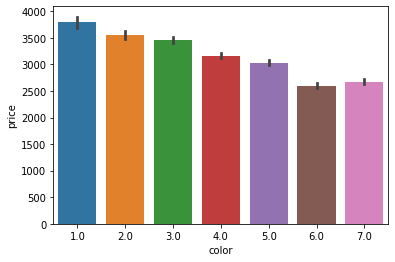

In [95]:
sns.barplot(x=df.color,y=df.price)

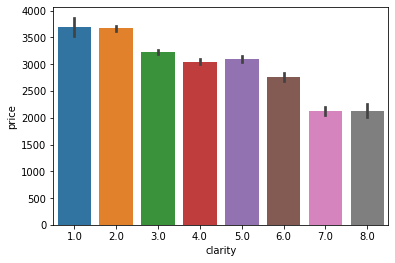

In [96]:
sns.barplot(x=df.clarity,y=df.price)

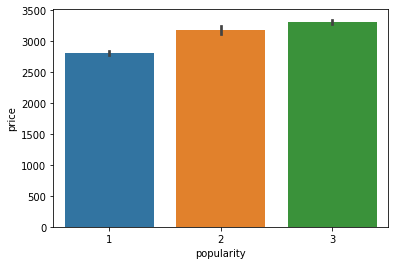

In [97]:
sns.barplot(x=df.popularity,y=df.price)

In [98]:
depth=(df.x.mean()+df.y.mean())/2
depth

5.7334746972759465

# 15.

In [99]:
df["computed depth"]=df.z/depth# df[df.z/np.mean(df.x,df.y)]

In [100]:
df

,id,carat,cut,color,clarity,popularity,depth,table,price,x,y,z,computed depth
0,1.0,0.23,5.0,6.0,2.0,3,61.5,55.0,326.0,3.95,3.98,2.43,0.423827
1,2.0,0.21,4.0,6.0,3.0,3,59.8,61.0,326.0,3.89,3.84,2.31,0.402897
2,3.0,0.23,2.0,6.0,5.0,2,61.9,57.0,327.0,4.05,4.07,2.31,0.402897
3,4.0,0.29,4.0,2.0,4.0,1,62.4,58.0,334.0,4.20,4.23,2.63,0.458710
4,5.0,0.31,2.0,1.0,2.0,3,63.3,58.0,335.0,4.34,4.35,2.75,0.479639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936.0,0.72,5.0,7.0,3.0,3,60.8,57.0,2757.0,5.75,5.76,3.50,0.610450
53936,53937.0,0.72,2.0,7.0,3.0,3,63.1,55.0,2757.0,5.69,5.75,3.61,0.629636
53937,53938.0,0.70,3.0,7.0,3.0,3,62.8,60.0,2757.0,5.66,5.68,3.56,0.620915
53938,53939.0,0.86,4.0,3.0,2.0,3,61.0,58.0,2757.0,6.15,6.12,3.74,0.652309


In [101]:
df[(df['depth']-df['computed depth'])>df['depth']*.05]

,id,carat,cut,color,clarity,popularity,depth,table,price,x,y,z,computed depth
0,1.0,0.23,5.0,6.0,2.0,3,61.5,55.0,326.0,3.95,3.98,2.43,0.423827
1,2.0,0.21,4.0,6.0,3.0,3,59.8,61.0,326.0,3.89,3.84,2.31,0.402897
2,3.0,0.23,2.0,6.0,5.0,2,61.9,57.0,327.0,4.05,4.07,2.31,0.402897
3,4.0,0.29,4.0,2.0,4.0,1,62.4,58.0,334.0,4.20,4.23,2.63,0.458710
4,5.0,0.31,2.0,1.0,2.0,3,63.3,58.0,335.0,4.34,4.35,2.75,0.479639
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,53936.0,0.72,5.0,7.0,3.0,3,60.8,57.0,2757.0,5.75,5.76,3.50,0.610450
53936,53937.0,0.72,2.0,7.0,3.0,3,63.1,55.0,2757.0,5.69,5.75,3.61,0.629636
53937,53938.0,0.70,3.0,7.0,3.0,3,62.8,60.0,2757.0,5.66,5.68,3.56,0.620915
53938,53939.0,0.86,4.0,3.0,2.0,3,61.0,58.0,2757.0,6.15,6.12,3.74,0.652309


3

0.0